
### CSC 4260/5260: Advanced Data Science & Applications
### Spring 2024 Project: Team 4
### Project Name: 2019 AiportDelays w/Weather and Aiport Details
### By: Anurag Dwivedi, Evan Burch, Jonathan Hooper

Problem Statement: The primary objective of this analysis is to develop a binary classification model that predicts whether a flight will experience a departure delay. This predictive model aims to identify potential delays based on a range of flight and airport-specific variables. The significance of this model lies in its potential to aid airlines, airport authorities, and passengers in anticipating delays, thereby enhancing the efficiency of flight operations and improving the overall travel experience.  

## Importing any necessary libraries!

In [ ]:
!pip install ydata-profiling
!pip install networkx

In [ ]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score,precision_score,recall_score
from ydata_profiling import ProfileReport
import networkx as nx
from scipy import stats

## Collecting the data from Kaggle

We load the full dataset here

In [ ]:
# Read the CSV file from the unzipped directory
full_data = pd.read_csv('full_data_flightdelay.csv')
#train_data = pd.read_csv('train.csv')

##Exploratory Data Analysis

Here we generate an initial summary of the full dataset and use it to create boxplots to visuzlize the data distribution.

In [ ]:
summary = full_data.describe()
print(summary)

In [ ]:
# Plot boxplot for median, min, max
summary[['50%', 'min', 'max']].plot(kind='box', vert=False, figsize=(10, 4))
plt.title('Boxplot of Median, Min, Max')
plt.xlabel('Values')
plt.ylabel('Statistics')
plt.show()

# Plot histogram for mean
summary['mean'].plot(kind='hist', bins=20, alpha=0.7, figsize=(10, 4))
plt.title('Histogram of Mean')
plt.xlabel('Mean')
plt.ylabel('Frequency')
plt.show()

Here we use the head function to take a peek at the first 5 rows. This allows us to ses what the attributes look like

In [ ]:
full_data.head()

,MONTH,DAY_OF_WEEK,DEP_DEL15,DEP_TIME_BLK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,...,PLANE_AGE,DEPARTING_AIRPORT,LATITUDE,LONGITUDE,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND
0,1,7,0,0800-0859,2,1,25,143,Southwest Airlines Co.,13056,...,8,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91
1,1,7,0,0700-0759,7,1,29,191,Delta Air Lines Inc.,13056,...,3,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91
2,1,7,0,0600-0659,7,1,27,199,Delta Air Lines Inc.,13056,...,18,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91
3,1,7,0,0600-0659,9,1,27,180,Delta Air Lines Inc.,13056,...,2,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91
4,1,7,0,0001-0559,7,1,10,182,Spirit Air Lines,13056,...,1,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91


In [ ]:
#train_data.head()

Next, we check for any missing and null values with the isna function

In [ ]:
#checking for any missing values
missing_values_count = full_data.isna().sum()
print("Number of missing values in each column:")
print(missing_values_count)

Number of missing values in each column:
MONTH                            0
DAY_OF_WEEK                      0
DEP_DEL15                        0
DEP_TIME_BLK                     0
DISTANCE_GROUP                   0
SEGMENT_NUMBER                   0
CONCURRENT_FLIGHTS               0
NUMBER_OF_SEATS                  0
CARRIER_NAME                     0
AIRPORT_FLIGHTS_MONTH            0
AIRLINE_FLIGHTS_MONTH            0
AIRLINE_AIRPORT_FLIGHTS_MONTH    0
AVG_MONTHLY_PASS_AIRPORT         0
AVG_MONTHLY_PASS_AIRLINE         0
FLT_ATTENDANTS_PER_PASS          0
GROUND_SERV_PER_PASS             0
PLANE_AGE                        0
DEPARTING_AIRPORT                0
LATITUDE                         0
LONGITUDE                        0
PREVIOUS_AIRPORT                 0
PRCP                             0
SNOW                             0
SNWD                             0
TMAX                             0
AWND                             0
dtype: int64


In [ ]:
#checking for any null values
full_data.isnull().sum()

MONTH                            0
DAY_OF_WEEK                      0
DEP_DEL15                        0
DEP_TIME_BLK                     0
DISTANCE_GROUP                   0
SEGMENT_NUMBER                   0
CONCURRENT_FLIGHTS               0
NUMBER_OF_SEATS                  0
CARRIER_NAME                     0
AIRPORT_FLIGHTS_MONTH            0
AIRLINE_FLIGHTS_MONTH            0
AIRLINE_AIRPORT_FLIGHTS_MONTH    0
AVG_MONTHLY_PASS_AIRPORT         0
AVG_MONTHLY_PASS_AIRLINE         0
FLT_ATTENDANTS_PER_PASS          0
GROUND_SERV_PER_PASS             0
PLANE_AGE                        0
DEPARTING_AIRPORT                0
LATITUDE                         0
LONGITUDE                        0
PREVIOUS_AIRPORT                 0
PRCP                             0
SNOW                             0
SNWD                             0
TMAX                             0
AWND                             0
dtype: int64

Next, we analyze the dimensionality of the dataset by looking at the data types of our attributes

In [ ]:
#looking at the data types
full_data.dtypes

MONTH                              int64
DAY_OF_WEEK                        int64
DEP_DEL15                          int64
DEP_TIME_BLK                      object
DISTANCE_GROUP                     int64
SEGMENT_NUMBER                     int64
CONCURRENT_FLIGHTS                 int64
NUMBER_OF_SEATS                    int64
CARRIER_NAME                      object
AIRPORT_FLIGHTS_MONTH              int64
AIRLINE_FLIGHTS_MONTH              int64
AIRLINE_AIRPORT_FLIGHTS_MONTH      int64
AVG_MONTHLY_PASS_AIRPORT           int64
AVG_MONTHLY_PASS_AIRLINE           int64
FLT_ATTENDANTS_PER_PASS          float64
GROUND_SERV_PER_PASS             float64
PLANE_AGE                          int64
DEPARTING_AIRPORT                 object
LATITUDE                         float64
LONGITUDE                        float64
PREVIOUS_AIRPORT                  object
PRCP                             float64
SNOW                             float64
SNWD                             float64
TMAX            

Next, we take a look at our target attribute, DEP_DEL15, which is either 1 or 0. This indicates whether or not the flight in question was delayed by more than 15 minutes.

We can see that there is a disparity here in our data. There are many more non-delayed flights than delayed flights.

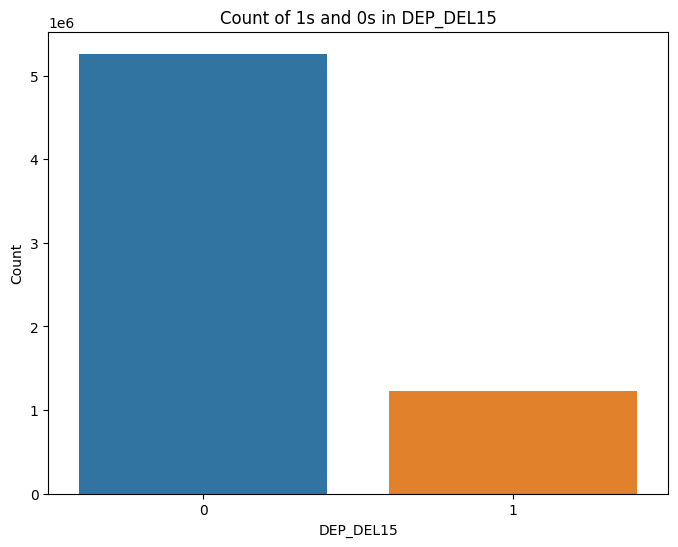

In [ ]:
column_to_plot = 'DEP_DEL15'

plt.figure(figsize=(8, 6))
sns.countplot(data=full_data, x=column_to_plot)
plt.title('Count of 1s and 0s in ' + column_to_plot)
plt.xlabel(column_to_plot)
plt.ylabel('Count')
plt.show()

Next, we eliminate attributes CARRIER_NAME and PREVIOUS_AIRPORT, as they are not likely to be helpful to our models

In [ ]:
columns_to_ignore = ['CARRIER_NAME', 'PREVIOUS_AIRPORT']
full_filtered = full_data.drop(columns=columns_to_ignore, errors='ignore')

Next, we create a correlation matrix to see if there are any immediately obvious attributes that correlate with a delayed departure.

Nothing stands out as noteworthy. Although there may be some attributes that correlate with each other because they are similar in their purpose.

<ipython-input-12-3f75d79aa863>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_train = full_filtered.corr()


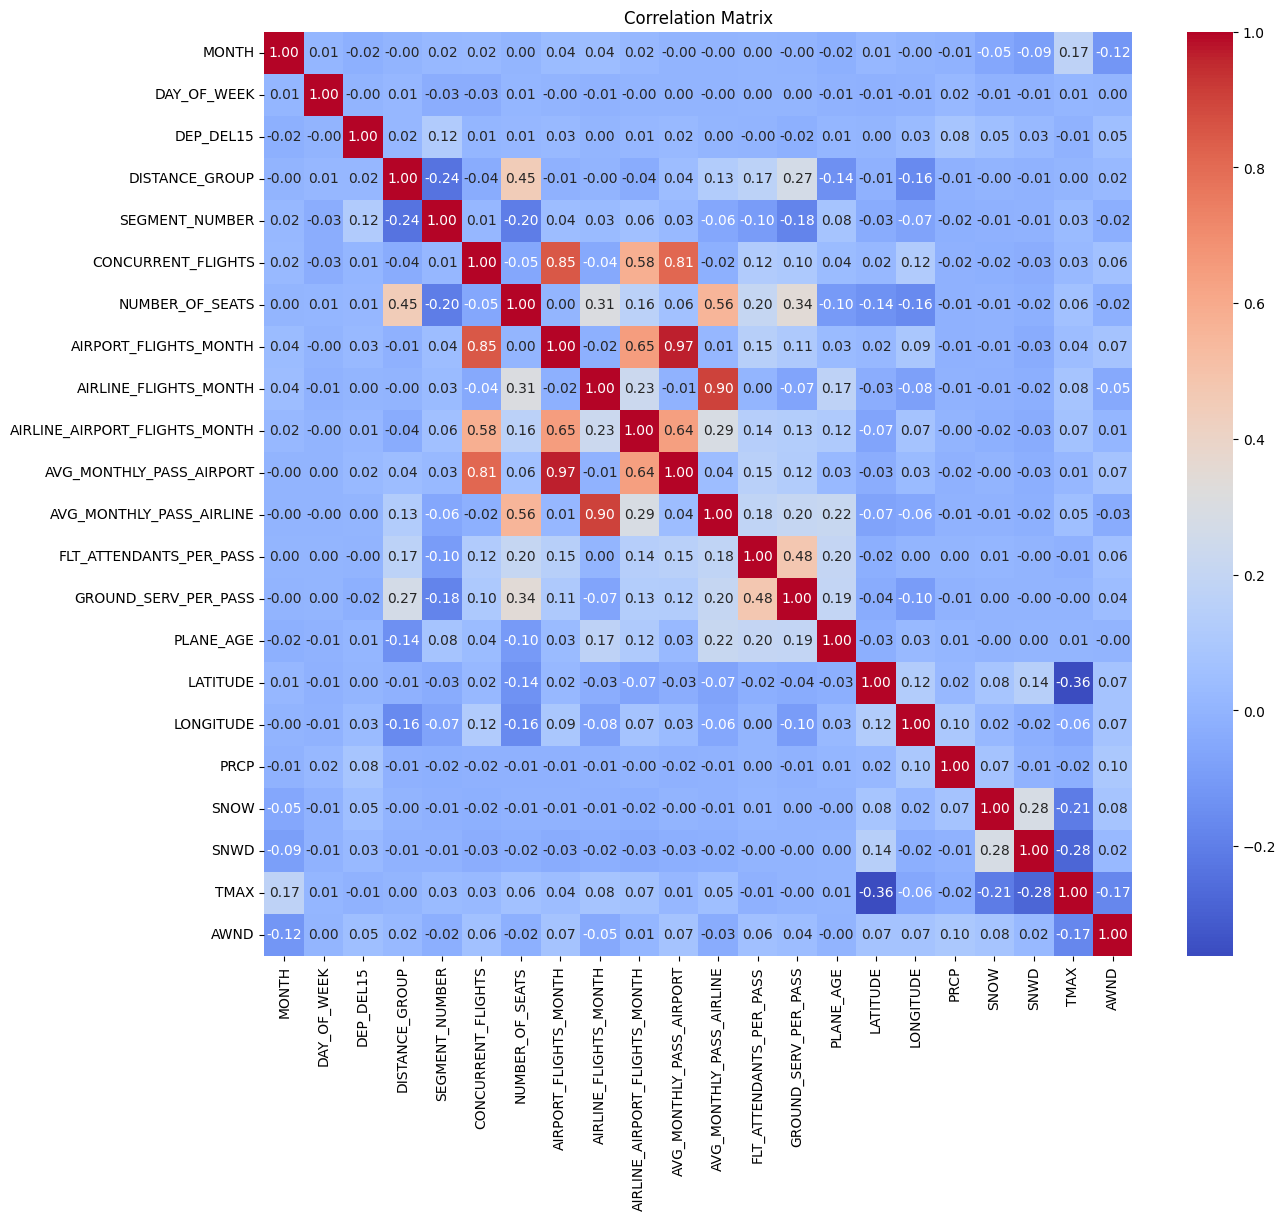

In [ ]:
correlation_train = full_filtered.corr()
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_train, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Next, we drop all rows that contain NAs. The number of rows with NAs is not many so it should not have a statistical effect on the dataset.

In [ ]:
full_data_clean = full_data.dropna()
print("Original Shape: ", full_data)
print("Cleaned: ", full_data_clean)

Original Shape:           MONTH  DAY_OF_WEEK  DEP_DEL15 DEP_TIME_BLK  DISTANCE_GROUP  \
0            1            7          0    0800-0859               2   
1            1            7          0    0700-0759               7   
2            1            7          0    0600-0659               7   
3            1            7          0    0600-0659               9   
4            1            7          0    0001-0559               7   
...        ...          ...        ...          ...             ...   
6489057     12            7          0    2300-2359               1   
6489058     12            7          0    1800-1859               1   
6489059     12            7          0    2000-2059               1   
6489060     12            7          0    2100-2159               1   
6489061     12            7          1    2100-2159               1   

         SEGMENT_NUMBER  CONCURRENT_FLIGHTS  NUMBER_OF_SEATS  \
0                     1                  25              143   
1 

Next, we use the ProfileReport function to create a comprehensive html report. This report reveals many of the same facts discovered above, and is a powerful EDA tool.

In [ ]:
report = ProfileReport(full_data, title = "report", explorative=True)
report.to_file("report.html")

/usr/local/lib/python3.10/dist-packages/ydata_profiling/profile_report.py:354: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]